In [56]:
import mne

In [57]:
import numpy as np

In [58]:
import matplotlib.pyplot as plt

In [59]:
# to load EEG and Annotations
edf_path = "/Users/argus/eeg_project/sleep-edf/sleep-cassette/SC4001E0-PSG.edf"
hypnogram_path = "/Users/argus/eeg_project/sleep-edf/sleep-cassette/SC4001EC-Hypnogram.edf"

In [60]:
raw = mne.io.read_raw_edf(edf_path, preload=True)
annotations = mne.read_annotations(hypnogram_path)
raw.set_annotations(annotations)

Extracting EDF parameters from /Users/argus/eeg_project/sleep-edf/sleep-cassette/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


/var/folders/by/1kb13_q970x3rshq836s9sc00000gn/T/ipykernel_11573/2116922695.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
/var/folders/by/1kb13_q970x3rshq836s9sc00000gn/T/ipykernel_11573/2116922695.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
/var/folders/by/1kb13_q970x3rshq836s9sc00000gn/T/ipykernel_11573/2116922695.py:1: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
/var/folders/by/1kb13_q970x3rshq836s9sc00000gn/T/ipykernel_11573/2116922695.py:3: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MiB, data loaded>

In [61]:
# to pick EEG channels: Fpz-Cz in sleep channel
raw.pick_channels(['Fpz-Cz'])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


ValueError: Missing channels from ch_names required by include:
['Fpz-Cz']

In [ ]:
raw = mne.io.read_raw_edf(edf_path, preload=True)

In [ ]:
annotations = mne.read_annotations(hypnogram_path)

In [ ]:
raw.set_annotations(annotations)

In [ ]:
print(raw.info)

In [ ]:
annotations = mne.read_annotations("/Users/argus/eeg_project/sleep-edf/sleep-cassette/SC4001EC-Hypnogram.edf")

In [62]:
raw.set_annotations(annotations)

/var/folders/by/1kb13_q970x3rshq836s9sc00000gn/T/ipykernel_11573/3266247359.py:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MiB, data loaded>

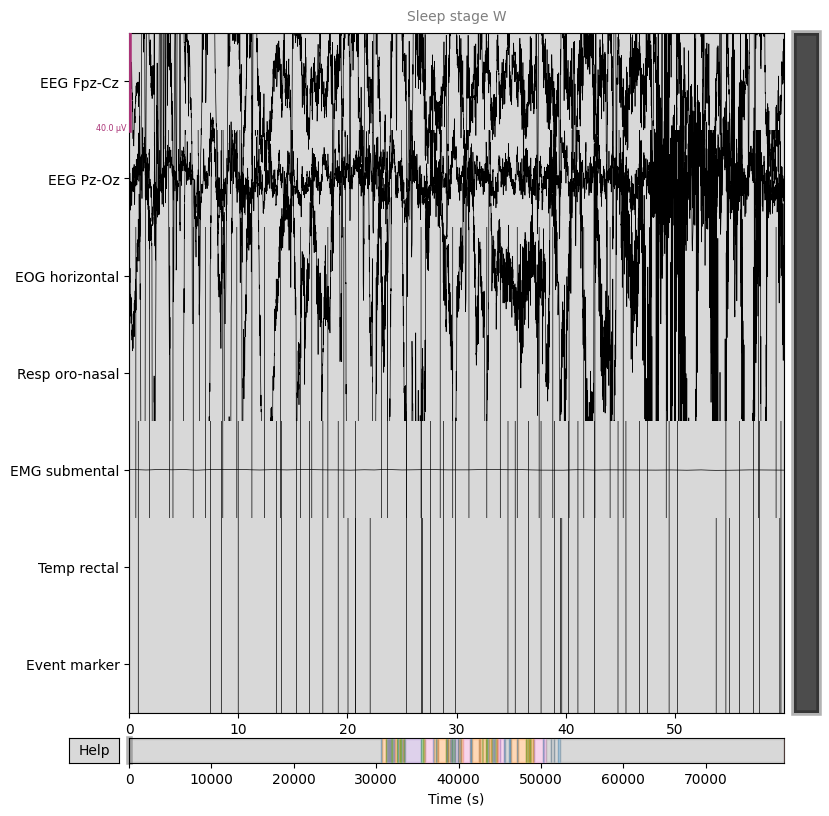

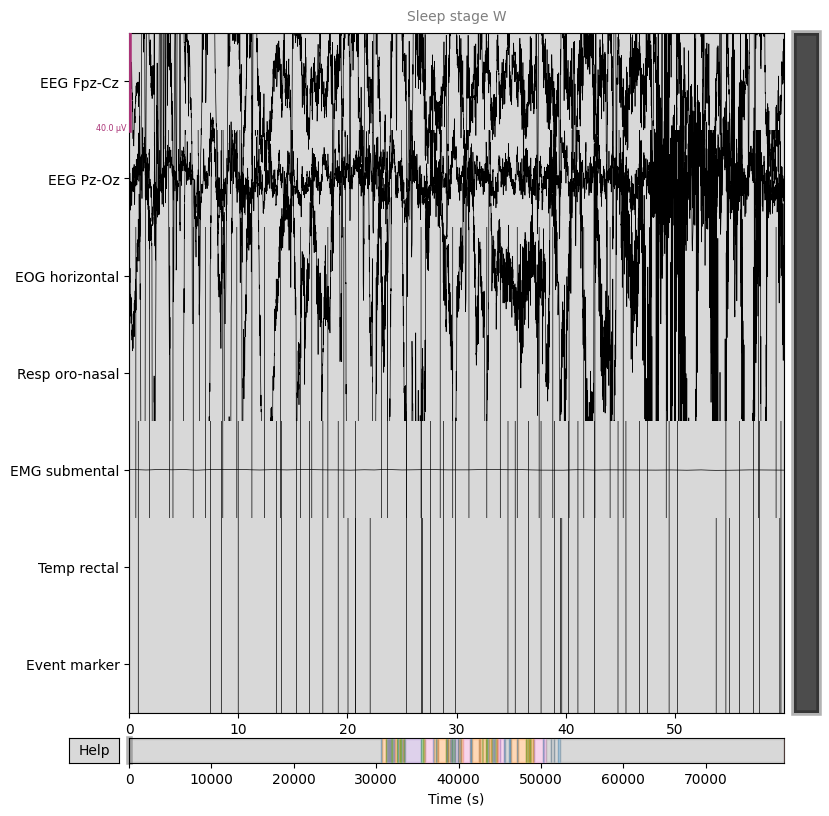

In [63]:
raw.plot(duration=60, n_channels=7)

In [72]:
raw.pick_channels(['EEG Fpz-Cz'])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<RawEDF | SC4001E0-PSG.edf, 1 x 7950000 (79500.0 s), ~60.7 MiB, data loaded>

In [65]:
raw.filter(0.3, 35)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 1101 samples (11.010 s)



<RawEDF | SC4001E0-PSG.edf, 1 x 7950000 (79500.0 s), ~60.7 MiB, data loaded>

In [66]:
mapping = {
    "Sleep stage W": 0,
    "Sleep stage 1": 1,
    "Sleep stage 2": 2,
    "Sleep stage 3": 3,
    "Sleep stage 4": 3,  # Merge stage 4 into stage 3
    "Sleep stage R": 4
}

In [67]:
events, _ = mne.events_from_annotations(raw, event_id=mapping)

Used Annotations descriptions: [np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), np.str_('Sleep stage R'), np.str_('Sleep stage W')]


In [68]:
epochs = mne.Epochs(
    raw, events, event_id=None,
    tmin=0, tmax=30, baseline=None, detrend=1, preload=True
)

Not setting metadata
153 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 153 events and 3001 original time points ...
0 bad epochs dropped


In [69]:
print(epochs)
print("Number of epochs:", len(epochs))

<Epochs | 153 events (all good), 0 – 30 s (baseline off), ~3.5 MiB, data loaded,
 '0': 12
 '1': 24
 '2': 40
 '3': 71
 '4': 6>
Number of epochs: 153


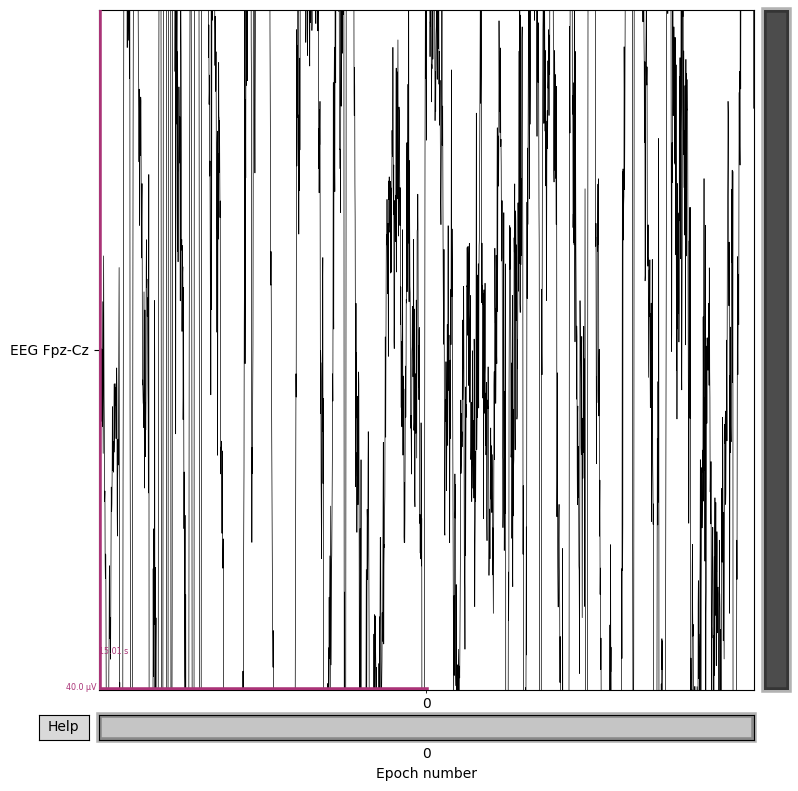

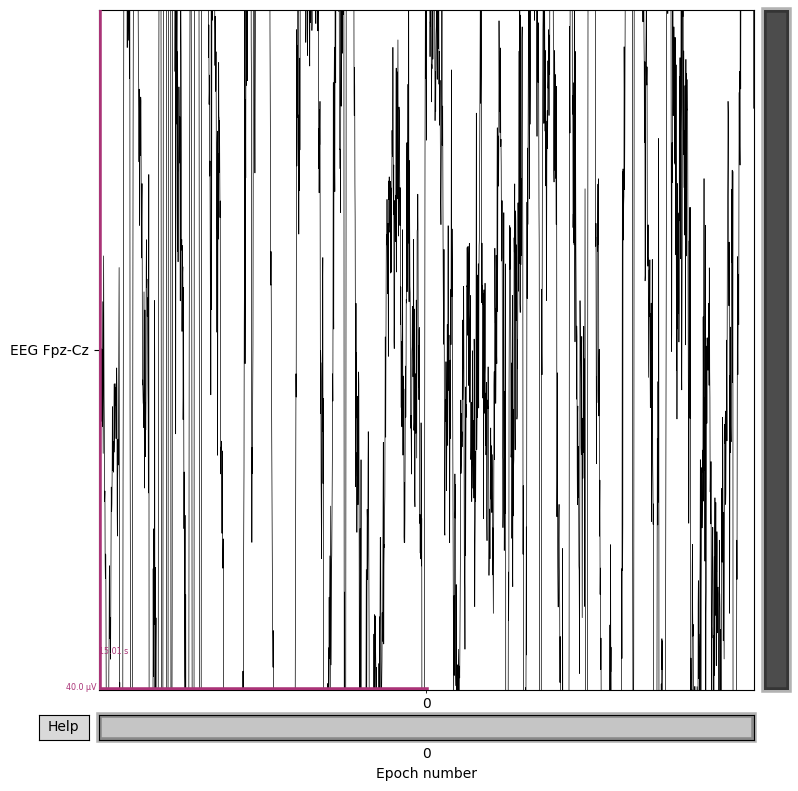

In [70]:
epochs[0].plot()


In [33]:
X = epochs.get_data()  # shape: (n_epochs, n_channels, n_times)
y = [e[2] for e in events]  # event labels

In [34]:
print("Data shape:", X.shape)
print("Labels shape:", len(y))

Data shape: (153, 1, 3001)
Labels shape: 153


In [35]:
import numpy as np

In [36]:

n_epochs, n_channels, n_times = X.shape
X_reshaped = X.reshape(n_epochs, n_channels * n_times)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_encoded, test_size=0.2, random_state=42
)

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
from sklearn.metrics import accuracy_score, classification_report

In [46]:

labels_present = np.unique(y_test)

print(classification_report(
    y_test, y_pred,
    labels=labels_present,
    target_names=[str(l) for l in le.inverse_transform(labels_present)]
))


              precision    recall  f1-score   support

           1       0.50      0.50      0.50         4
           2       0.50      0.20      0.29        10
           3       0.65      0.94      0.77        16
           4       0.00      0.00      0.00         1

    accuracy                           0.61        31
   macro avg       0.41      0.41      0.39        31
weighted avg       0.56      0.61      0.55        31



/Users/argus/eeg_project/eeg_sleep/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/argus/eeg_project/eeg_sleep/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/argus/eeg_project/eeg_sleep/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:

clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
y_pred = clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, classification_report

In [53]:
import numpy as np

In [54]:

labels_present = np.unique(y_test)

In [55]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(
    y_test, y_pred,
    labels=labels_present,
    target_names=[str(l) for l in le.inverse_transform(labels_present)],
    zero_division=0
))

Accuracy: 0.5483870967741935
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.67      0.40      0.50         5
           2       1.00      0.12      0.22         8
           3       0.52      1.00      0.68        14
           4       0.00      0.00      0.00         1

    accuracy                           0.55        31
   macro avg       0.44      0.30      0.28        31
weighted avg       0.60      0.55      0.45        31

